In [31]:
import pandas as pd

In [449]:
import seaborn as sns

In [461]:
import numpy as np

In [41]:
fpath = 'data/prep/'
dfile = 'form_data_v2.0.csv'

In [43]:
df = pd.read_csv( fpath + dfile, header=0, parse_dates=True )

In [8]:
new = df[df.CourseName=='Newmarket']
new

,RaceId,CourseName,RaceDate,RaceTime,Class,Prize,FieldSize,Distance,RaceWinTime,Posn,...,RT,AgeMin,AgeMax,AW,Going1,Going1N,Won,Placed,ReturnWin,ReturnPlace
23718,42472109,Newmarket,2016-04-12,14:10:00,4.0,5499.0,14,1760,102.09,1,...,MdF,3.0,3.0,False,goodtosoft,4.0,True,0.2,2.75,1.35
23719,42472109,Newmarket,2016-04-12,14:10:00,4.0,5499.0,14,1760,102.09,2,...,MdF,3.0,3.0,False,goodtosoft,4.0,False,0.2,0.00,2.10
23720,42472109,Newmarket,2016-04-12,14:10:00,4.0,5499.0,14,1760,102.09,3,...,MdF,3.0,3.0,False,goodtosoft,4.0,False,0.2,0.00,3.20
23721,42472109,Newmarket,2016-04-12,14:10:00,4.0,5499.0,14,1760,102.09,4,...,MdF,3.0,3.0,False,goodtosoft,4.0,False,0.0,0.00,0.00
23722,42472109,Newmarket,2016-04-12,14:10:00,4.0,5499.0,14,1760,102.09,5,...,MdF,3.0,3.0,False,goodtosoft,4.0,False,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066786,45598121,Newmarket,2024-11-02,16:00:00,4.0,6185.0,9,1540,88.89,5,...,Hc,3.0,NaN,False,soft,5.0,False,0.0,0.00,0.00
1066787,45598121,Newmarket,2024-11-02,16:00:00,4.0,6185.0,9,1540,88.89,6,...,Hc,3.0,NaN,False,soft,5.0,False,0.0,0.00,0.00
1066788,45598121,Newmarket,2024-11-02,16:00:00,4.0,6185.0,9,1540,88.89,7,...,Hc,3.0,NaN,False,soft,5.0,False,0.0,0.00,0.00
1066789,45598121,Newmarket,2024-11-02,16:00:00,4.0,6185.0,9,1540,88.89,8,...,Hc,3.0,NaN,False,soft,5.0,False,0.0,0.00,0.00


In [29]:
df[df.RT=='Hc'][['CourseName', 'ReturnWin']].groupby('CourseName').mean().squeeze().nlargest(20)

CourseName
Salisbury      0.929504
Laytown        0.867782
Tipperary      0.843513
Pontefract     0.842370
Epsom Downs    0.837759
Tramore        0.835891
Nottingham     0.828969
Leicester      0.828961
Yarmouth       0.821730
Carlisle       0.819402
Bath           0.818955
Ripon          0.815687
Brighton       0.815218
Sandown        0.813121
Goodwood       0.811497
Thurles        0.803646
Haydock        0.803314
Hamilton       0.800430
Thirsk         0.799466
Ballinrobe     0.799431
Name: ReturnWin, dtype: float64

In [597]:
yor = df[df.CourseName=='York']
# yor

In [599]:
yor1 = yor[['FieldSize','Draw','Sp','Posn','TotalBtn','ReturnPlace','ReturnWin']]

In [601]:
yor1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12771 entries, 35084 to 1058781
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FieldSize    12771 non-null  int64  
 1   Draw         12771 non-null  float64
 2   Sp           12771 non-null  float64
 3   Posn         12771 non-null  object 
 4   TotalBtn     12734 non-null  float64
 5   ReturnPlace  12771 non-null  float64
 6   ReturnWin    12771 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 798.2+ KB


In [603]:
yor1.Posn.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', 'F', 'U', 'PU',
       '21', 'RR', '22'], dtype=object)

In [605]:
# did not finish implies nothing about draw bias
yor1 = yor1[yor1.Posn.str.isnumeric()]

In [607]:
# yor2 = pd.DataFrame({'FieldSize': yor1.FieldSize, 'Draw': yor1.Draw.apply(int), 'Index': yor1.Sp/yor1.Posn.apply(int)})

In [609]:
# yor2 = pd.DataFrame({'FieldSize': yor1.FieldSize, 'Draw': yor1.Draw.apply(int), 'Index': yor1.Sp/(yor1.TotalBtn+1)})

In [611]:
yor2 = pd.DataFrame({'FieldSize': yor1.FieldSize, 'Draw': yor1.Draw.apply(int), 'Index': yor1.ReturnPlace+yor1.ReturnWin})

In [613]:
yor3a = yor2[['FieldSize','Draw','Index']].groupby(['FieldSize','Draw']).mean()
yor3n = yor2[['FieldSize','Draw','Index']].groupby(['FieldSize','Draw']).count()

In [615]:
yor4a = yor3a.reset_index().pivot_table(index='FieldSize',columns='Draw')
yor4n = yor3n.reset_index().pivot_table(index='FieldSize',columns='Draw')

In [617]:
# yor4a.fillna(0, inplace=True) # NAs are automatically masked in heatmap
yor4n.fillna(0, inplace=True)

In [619]:
yor5a = yor4a.to_numpy()
yor5n = yor4n.to_numpy()

In [621]:
# log-scale support (n)
yor5n = np.round(np.log(yor5n+1))

In [623]:
i1 = (yor5.shape[1] - (yor5!=0).sum(axis=1))//2
i2 = (yor5!=0).sum(axis=1)

In [625]:
# i1 = (yor5.shape[1] - yor4a.index.values)//2
# i2 = (yor5!=0).sum(axis=1)

In [627]:
yor6a = np.zeros(yor5a.shape)
yor6n = np.empty(yor5n.shape, dtype=str)

In [629]:
for i in range(yor5.shape[0]):
    yor6a[ i, i1[i]:(i1[i]+i2[i]) ] = yor5a[ i, :i2[i]] 
    yor6n[ i, i1[i]:(i1[i]+i2[i]) ] = yor5n[ i, :i2[i]] 

In [667]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure()
plt.title('E/W Return Draw Bias, York (all races)')

Text(0.5, 1.0, 'E/W Return Draw Bias, York (all races)')

In [669]:
sns.heatmap(pd.DataFrame(yor6a, index=yor4a.index, columns=yor4a.columns.get_level_values(1).rename('Draw (low to high, centered)')),
            cmap='gist_earth_r', robust=True, annot=yor6n, fmt='', annot_kws={'fontsize': 'xx-small'},
            xticklabels=False, yticklabels=2)
plt.savefig('image.png')

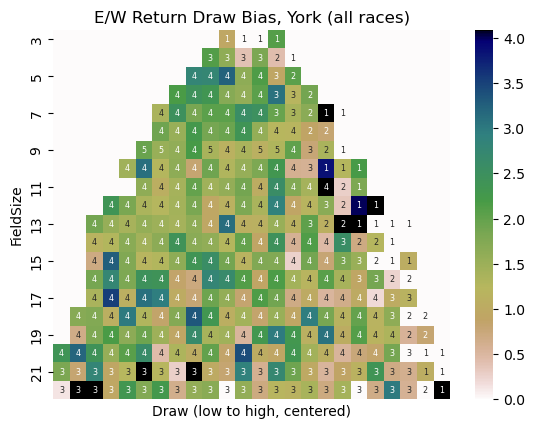

In [653]:
plt.show()